# Client order 9 :: *ipynb solution draft* <br>

## Client Order #9

بررسی کنید مهمترین عامل در خرید مشتری کدام ویژگی لپ‌تاپ است.

---

### Read Data

In [65]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Read data / Clean version of sales_data.csv

sales_data = pd.read_csv("sales_data_clean.csv")

In [67]:
sales_data.head()

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,RAM,OS,...,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Rating,Store
0,0,Hamedan,1396-10-26,H,Dell,Vostro 3568,Notebook,15.6,8,Windows,...,2.5,256,0,0,0,256,AMD,Radeon R5 M420,NaN,NaN
1,1,Kermanshah,1394-04-21,H,Lenovo,Yoga 720-13IKB,2 in 1 Convertible,13.3,8,Windows,...,2.5,256,0,0,0,256,Intel,HD Graphics 620,NaN,NaN
2,2,Rasht,1402-05-24,M,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,8,Windows,...,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,NaN,NaN
3,3,Kermanshah,1397-06-17,H,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows,...,1.8,256,0,0,0,256,AMD,Radeon 530,NaN,NaN
4,4,Karaj,1392-09-30,L,Acer,Aspire E5-576G,Notebook,15.6,4,Windows,...,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,NaN,NaN


In [68]:
# sort the data by order date

sales_data_sorted = sales_data.sort_values(by=["Order_Date"])

In [69]:
sales_data_sorted.columns

Index(['Order_ID', 'Branch', 'Order_Date', 'Order_Priority', 'Manufacturer',
       'Model_Name', 'Category', 'Screen_Size', 'RAM', 'OS', 'OS_Version',
       'Weight', 'Price', 'Quantity', 'Discount', 'Total_Price', 'Profit',
       'Ship_Duration', 'Screen_Type', 'Screen_resolution', 'CPU_Brand',
       'CPU_Model', 'CPU_GHZ', 'Storage_SSD', 'Storage_HDD', 'Storage_Hybrid',
       'Storage_Flash', 'Storage_Total', 'GPU_Brand', 'GPU_Model', 'Rating',
       'Store'],
      dtype='object')

In [70]:
# Subset of features chosen to be analyzed

selected_features = [
    "Manufacturer",
    "Category",
    "Screen_Size",
    "Screen_Type",
    "Screen_resolution",
    "RAM",
    "OS",
    "OS_Version",
    "CPU_Brand",
    "CPU_Model",
    "CPU_GHZ",
    "GPU_Brand",
    "GPU_Model",
    "Storage_SSD",
    "Storage_HDD",
    "Storage_Hybrid",
    "Storage_Flash",  # 'Storage_Total',
]

### Assumptions:
- We don't have a direct column indicating the number of sales or any purchase indicator.
- We can assume that the frequency of occurence of a specific feature in the dataset is indicative of its popularity and influence on purchase decisions.
- :: if a particular laptop feature appears more often, it may be more popular among customers.

     Purchase Indicator:
        The frequency of occurrence of each feature value

### Solution :: **Correlation Analysis**

1. Calculate frequency of each unique value for the selected features in the dataframe
2. Rank these feature vlaues based on their frequencies
3. Correlate the ranking with the calculated order of the dataset to distinguish any trend in the feature popularity over time

In [71]:
correlations_sorted = {}

for feature in selected_features:
    ranked_values = (
        sales_data_sorted[feature].map(sales_data_sorted[feature].value_counts()).rank()
    )

    correlation = ranked_values.corr(pd.Series(range(len(sales_data_sorted))))
    correlations_sorted[feature] = correlation

correlations_sorted = {
    k: v
    for k, v in sorted(
        correlations_sorted.items(), key=lambda item: abs(item[1]), reverse=True
    )
}
correlations_sorted

{'Screen_Type': 0.002327872298688404,
 'Category': 0.0018913651388763747,
 'Storage_HDD': 0.0017294563959249299,
 'Storage_SSD': 0.001718283791086534,
 'GPU_Brand': -0.0015850609011266482,
 'RAM': 0.0015617773868403318,
 'GPU_Model': -0.0015027743065722104,
 'OS_Version': -0.0012605149725269903,
 'CPU_GHZ': 0.0011153802768726717,
 'Manufacturer': -0.0011075431652815253,
 'Screen_resolution': 0.0008989180333018269,
 'Storage_Flash': -0.0006288019664704255,
 'OS': 0.0006231567904609357,
 'CPU_Brand': 0.000566491904153939,
 'Screen_Size': -0.0005318746771864105,
 'CPU_Model': 0.0004958753463202725,
 'Storage_Hybrid': -0.0004908952596975239}

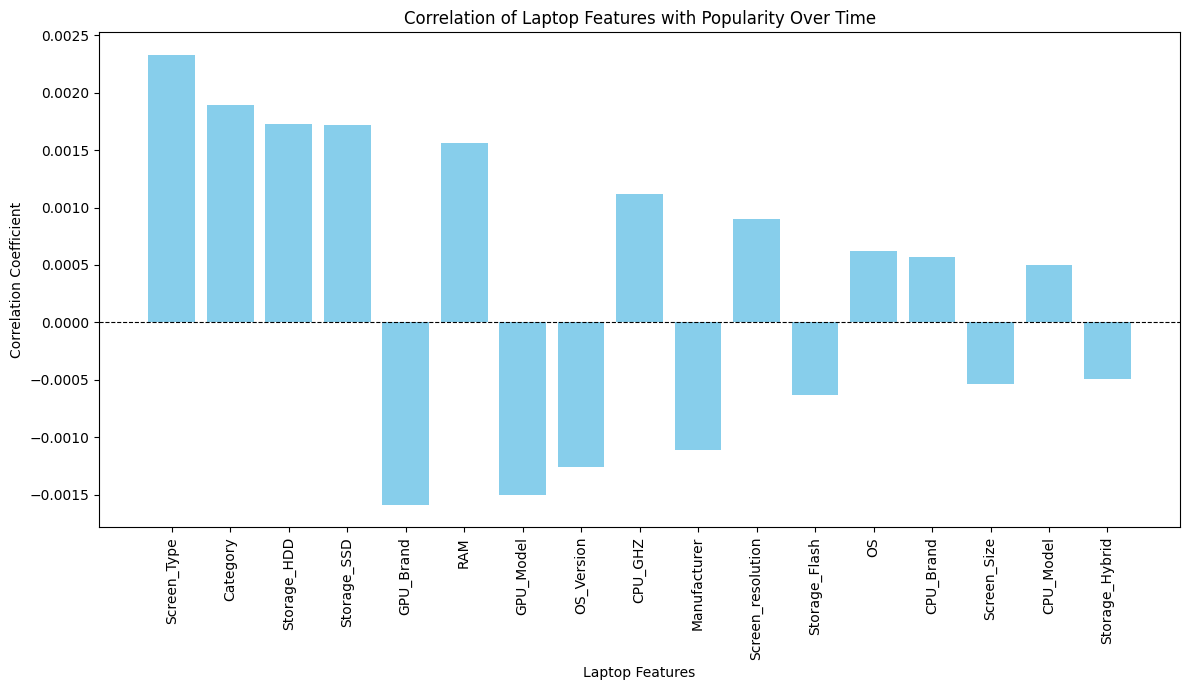

In [72]:
plt.figure(figsize=(12, 7))
plt.bar(correlations_sorted.keys(), correlations_sorted.values(), color="skyblue")
plt.axhline(
    y=0, color="black", linestyle="--", linewidth=0.8
)  # Add a reference line at y=0 for clarity
plt.title("Correlation of Laptop Features with Popularity Over Time")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Laptop Features")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

As seen in correlation values and in bar chart, Top 6 influential features on sales are:
1. Screen Type
2. Category
3. Storage : HDD
4. Storage : SSD
5. GPU Brand
6. RAM